## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [32]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [33]:
#import the dataset 
df = pd.read_csv('ab_data.csv')

#show the first 10 rows 
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [34]:
#show nr of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [35]:
# find nr of unique user_id
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [36]:
# find nr of converted users 
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [37]:
# find nr of times new_page and treatment don't line up
len(df.query('group == "treatment" & landing_page != "new_page"')) + \
len(df.query('group != "treatment" & landing_page == "new_page"'))

3893

f. Do any of the rows have missing values?

In [38]:
# find nr of missing rows
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [39]:
# remove rows

df2 = df.drop(df[((df.group == 'control') & (df.landing_page == 'new_page')) | \
                 ((df.group == 'treatment') & (df.landing_page == 'old_page'))].index)

In [40]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [41]:
# find nr of unique user_id in df2

df['user_id'].nunique()


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [42]:
# find the duplicate user_id
df2[df2.duplicated(['user_id'], keep= False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


The repeated user_id is 773192

c. What is the row information for the repeat **user_id**? 

The rows are 1899 and 2893

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [43]:
#remove one duplicate 
df2.drop_duplicates(['user_id'], inplace=True)

In [44]:
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [45]:
# calculating probability of an individual converting regardless of the page they receive
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [46]:
# calculating the probability of an individual converting given that the individual was in the control group or treatment group
df2.groupby('group').mean()

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.719290,0.118808


c. Given that an individual was in the `treatment` group, what is the probability they converted?

See above the answer

d. What is the probability that an individual received the new page?

In [47]:
# calculating the probability of an individual receiving a new page
df2[df2['landing_page']== 'new_page']['group'].count()/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

#### Answer
Based on the results obtained, we can see that the treatment group has a probability of conversion (11.88) lower than the control group (12.03). In conclusion the new page did not increase the coversion rate so I wouldn't reccomend switching to a new page. 

In [48]:
# calculating the obs_diff
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
obs_diff

-0.0015782389853555567

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Answer
  
    H0: p_new - p_old <= 0
    H1: p_new - p_old > 0




`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [49]:
#calculating the convert rate for p_new
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [50]:
#calculating the convert rate for p_old
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [51]:
#calculating the nr of individuals in the treatment group 
n_new = df2[df2['landing_page']=='new_page']['landing_page'].count()
n_new

145310

d. What is $n_{old}$?

In [52]:
# calculating the nr of individuals in the control group
n_old = df2[df2['landing_page']=='old_page']['landing_page'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [53]:
new_page_converted = np.random.choice([0,1], n_new, p = [p_new, 1-p_new])
new_page_converted.mean()

0.8802904135985136

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [54]:
old_page_converted = np.random.choice([0,1], n_old, p = [p_old, 1-p_old])
old_page_converted.mean()

0.8802745157426656

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [55]:
new_page_converted.mean() - old_page_converted.mean()

1.5897855847990527e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [56]:
# runing the simulation 10000 times

p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([0,1], n_new, p = [p_new, 1-p_new]).mean()
    old_page_converted = np.random.choice([0,1], n_old, p = [p_old, 1-p_old]).mean()
    p_diffs.append(new_page_converted - old_page_converted )



i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

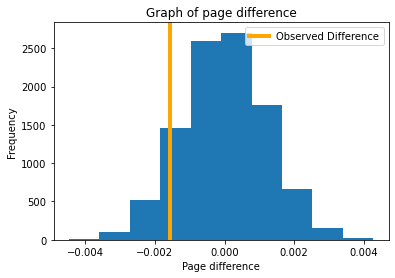

In [57]:
#ploting a histogram of page difference

p_diffs = np.array(p_diffs)

plt.hist(p_diffs)
plt.axvline(x=obs_diff, 
            linewidth = 4, color = 'orange', label="Observed Difference")
plt.title('Graph of page difference')
plt.ylabel('Frequency')
plt.xlabel('Page difference')
plt.legend()




j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [58]:
#calculating the proportion of p_diffs greater than obs_diff

(p_diffs > obs_diff).mean()

0.9044

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### Answer
In part j, we computed the proportion of page difference that are greater than the difference observed in ab_data.csv. In scientific studies this value is called p-value, and is a number describing how likely it is that the null hypothesis is true. The p-value of 0.9 provide support for the null hypothesis, so therefore we cannot reject it and we should not switch to the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [59]:
import statsmodels.api as sm

convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))

n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

convert_old, convert_new, n_old, n_new



(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [60]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [61]:
# the significance of z-score

from scipy.stats import norm
norm.cdf(z_score) 

0.9050583127590245

In [62]:
# value of 95% confidence 

norm.ppf(1-(0.05))

1.6448536269514722

#### Answer
Both, p_value and z_score agree with the findings in parts j. and k. z_score is less than the 95% value of confidence, so the null hypothesis is not rejected. Hence, the conclusion is similar as in part j: the acceptance of null hypothesis.  

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Answer 
In this case we should perform logistic regression. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [63]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2['intercept'] = 1 

df2.head(10)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [68]:
import statsmodels.api as sm
model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=model.fit()

# reference https://www.statsmodels.org/stable/discretemod.html

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [70]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 Sep 2021   Pseudo R-squ.:               8.077e-06
Time:                        14:11:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### Answer
The p-value associated with ab_page is 0.19. With the regression model, the hypothesis were: 
H0: the difference between pages is equal to 0
H1: the difference between pages is less or greater than 0. 
The p-value is different from the value found in Part II due to different hypotheses tested. In Part III we are doing a two-tailed test, while in Part II we did one-tailed test. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### Answer 
Adding other factors into our regression model, may influence the conversion rate of users, due to age, gender or time of the day. Could also increase or decrease confidence intervals. 
A disatvantage of adding multiple factors is that it adds complexity, such as the multiple comparison problem or many independent variables that may lead to overfitting. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [71]:
# load countries dataset
df3 = pd.read_csv('countries.csv')

#merging the datasets
df4 = df3.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
df4.head(10)


,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1


In [72]:
df4['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [73]:
df4['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [74]:
#creating dummy variables
df4[['UK','US','CA']] = pd.get_dummies(df4['country'])
df4.head(10)



,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,0,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,0,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,0,1


In [75]:
#creating new pages
df4['UK_ab_page'] = df4['UK'] * df4['ab_page']
df4['US_ab_page'] = df4['US'] * df4['ab_page']

df4.head(10)


,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,CA,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,1,0,0,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,0,1,0,0
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,0,1,0,0
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,0,1,0,0


In [76]:
model = sm.Logit(df4['converted'], df4[['intercept','ab_page','US','UK']])
results=model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 26 Sep 2021   Pseudo R-squ.:               2.323e-05
Time:                        14:15:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0099      0.013      0.743      0.457      -0.016       0.036
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

We can see from the results and model above, that adding the country had no significant impact on conversion. The p-values are high ( above 0.05) and adding ab_page to the model has not created any significant difference. Therefore the null hypothesis cannot be rejected. 

Note: I set CA as a baseline

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [77]:
# Fit Your Linear Model And Obtain the Results

model=sm.Logit(df4['converted'],df4[['intercept','ab_page','US_ab_page','UK_ab_page']])
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 26 Sep 2021   Pseudo R-squ.:               3.351e-05
Time:                        14:15:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0183      0.013     -1.449      0.147      -0.043       0.006
US_ab_page     0.0257      0.019      1.363      0.173      -0.011       0.063
UK_ab_page    -0.0644      0.038     -1.679      0.093      -0.140       0.011
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions
Based on the results obtained, we failed to reject the null hypothesis. There is no strong evidence to suggest that the countries added influence the conversion rate and that a new page increases the conversion rate compared to the old page. 
Therefore, I would recomend that the old page is kept until further data will be made available. 



## References

https://cmsdk.com/python/calculating-a-probability-based-on-several-variables-in-a-pandas-dataframe.html  <br />
https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html <br />
https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples <br />
https://mashimo.wordpress.com/2017/07/26/logistic-regression-with-python-statsmodels/ <br />
https://appdividend.com/2020/04/29/python-numpy-exp-function-example/ <br />
https://www.statsmodels.org/stable/discretemod.html <br />
https://github.com/tdpetrou/Machine-Learning-Books-With-Python/tree/master/Introduction%20to%20Statistical%20Learning

Thomas Haslwanter (2016). An Introduction to Statistics with Python




